Iteration 0, Cost: 113.30734583467435
Iteration 100, Cost: 15.107796857131794
Iteration 200, Cost: 3.1289023092798156
Iteration 300, Cost: 1.615806318027298
Iteration 400, Cost: 1.4168263738504914


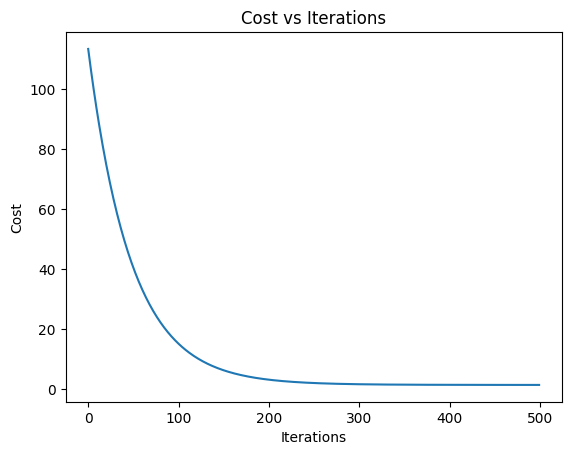

Training MSE: 2.778404253874357, R2: 0.8962519816802512
Test MSE: 2.924719633663268, R2: 0.8918637818286206


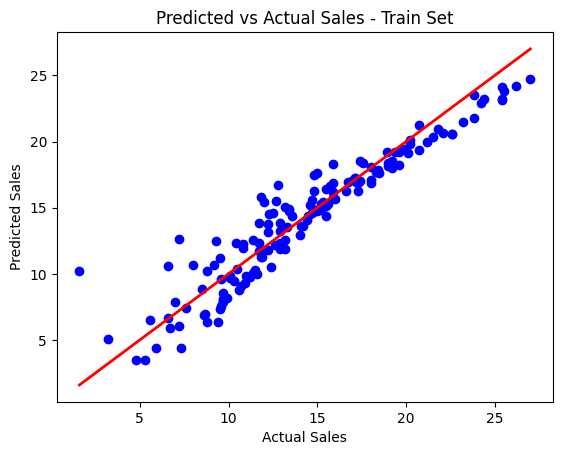

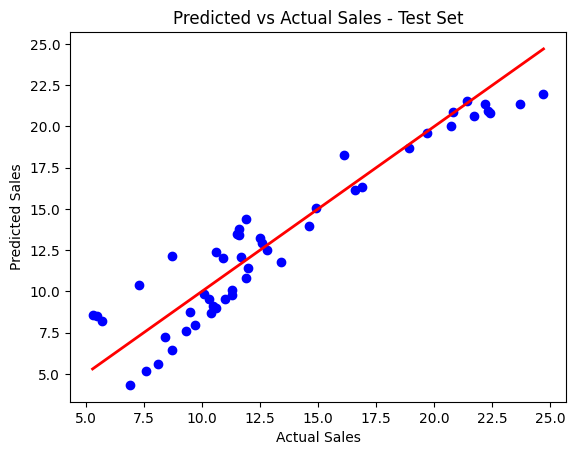

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data_path = 'data/Advertising.csv'
data = pd.read_csv(data_path)

# Standardize the features
scaler = StandardScaler()
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Add intercept term (column of ones) to the features
X_scaled = scaler.fit_transform(X)
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# Split the dataset into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize weights (0s as specified)
def initialize_weights():
    return np.zeros(X_train.shape[1])

# Predict using the linear model
def predict(X, weights):
    return np.dot(X, weights)

# Compute the cost function (Mean Squared Error)
def compute_cost(X, y, weights):
    m = len(y)
    predictions = predict(X, weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Compute the gradient of the cost function
def compute_gradient(X, y, weights):
    m = len(y)
    predictions = predict(X, weights)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    return gradient

# Update the weights using gradient descent
def update_weights(weights, gradient, learning_rate):
    return weights - learning_rate * gradient

# Gradient descent algorithm
def gradient_descent(X, y, weights, learning_rate, iterations):
    costs = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights = update_weights(weights, gradient, learning_rate)
        cost = compute_cost(X, y, weights)
        costs.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    return weights, costs

# Train the model using gradient descent
def train_model(X_train, y_train, learning_rate=0.01, iterations=500):
    weights = initialize_weights()
    optimal_weights, costs = gradient_descent(X_train, y_train, weights, learning_rate, iterations)
    return optimal_weights, costs

# Plot the cost function over iterations
def plot_costs(costs):
    plt.plot(costs)
    plt.title("Cost vs Iterations")
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

# Predict sales and evaluate the model
def evaluate_model(X_train, X_test, y_train, y_test, weights):
    # Training set predictions
    y_train_pred = predict(X_train, weights)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Test set predictions
    y_test_pred = predict(X_test, weights)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse}, R2: {train_r2}")
    print(f"Test MSE: {test_mse}, R2: {test_r2}")

    return y_train_pred, y_test_pred

# Plot predictions vs actual values for train and test sets separately
def plot_predictions(y_true, y_pred, dataset_type):
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', lw=2)  # Line y=x for reference
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Predicted vs Actual Sales - {dataset_type} Set")
    plt.show()

# Execute training and evaluation
learning_rate = 0.01
iterations = 500
optimal_weights, costs = train_model(X_train, y_train, learning_rate, iterations)

# Plot the cost reduction over iterations
plot_costs(costs)

# Evaluate the model on the train and test sets
y_train_pred, y_test_pred = evaluate_model(X_train, X_test, y_train, y_test, optimal_weights)

# Plot predictions vs actual values for train and test sets
plot_predictions(y_train, y_train_pred, "Train")
plot_predictions(y_test, y_test_pred, "Test")


# Analysis

### 1. What are the optimal weights found by your implemented gradient descent?  Plug it into the linear model:

In [2]:
# Gradient descent algorithm
def gradient_descent(X, y, weights, learning_rate, iterations):
    costs = []
    for i in range(iterations):
        gradient = compute_gradient(X, y, weights)
        weights = update_weights(weights, gradient, learning_rate)
        cost = compute_cost(X, y, weights)
        costs.append(cost)
    return weights, costs

# Train the model using gradient descent
optimal_weights, costs = train_model(X_train, y_train, learning_rate=0.01, iterations=500)
print(f"Optimal weights: {optimal_weights}")

Optimal weights: [13.90499354  3.899467    2.78888618  0.1087248 ]


These weights indicate that TV advertising has the strongest positive influence on sales, followed closely by Radio. Newspaper has a relatively small effect, suggesting its impact on sales is less significant compared to the other two.

### 2. Provide a scatter plot of the 𝑦()	𝑎𝑛𝑑	𝑦^(i) for both the train and test set.   Is there a trend?  Provide an r2 score

Training MSE: 2.778404253874357, R2: 0.8962519816802512
Test MSE: 2.924719633663268, R2: 0.8918637818286206


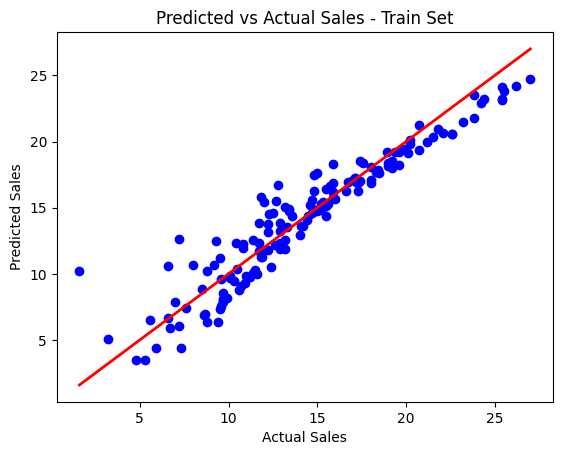

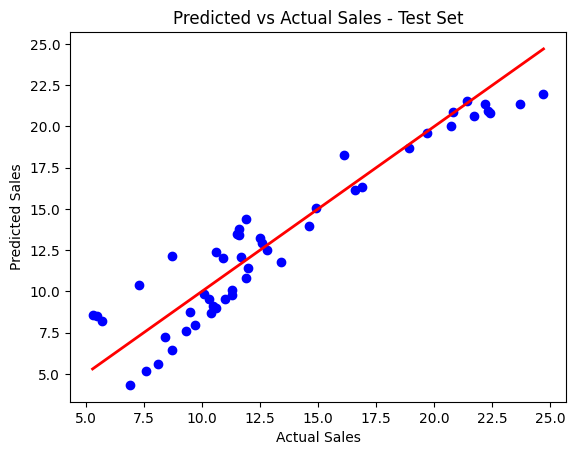

In [3]:
def evaluate_model(X_train, X_test, y_train, y_test, weights):
    # Training set predictions
    y_train_pred = predict(X_train, weights)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Test set predictions
    y_test_pred = predict(X_test, weights)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse}, R2: {train_r2}")
    print(f"Test MSE: {test_mse}, R2: {test_r2}")

    return y_train_pred, y_test_pred

# Evaluate the model on train and test sets
y_train_pred, y_test_pred = evaluate_model(X_train, X_test, y_train, y_test, optimal_weights)

# Plot predictions for train and test sets
plot_predictions(y_train, y_train_pred, "Train")
plot_predictions(y_test, y_test_pred, "Test")

### Training Set

The scatter plot for the training set shows a strong correlation between predicted and actual sales values. The points are close to the 𝑦 = 𝑥 line, indicating a good model fit.

R² Score: 0.89, meaning the model explains 89% of the variance in the training data.


### Test Set

The test set also shows a close alignment between predicted and actual sales values, with a slightly lower spread compared to the training set.

R² Score: 0.91, which indicates the model generalizes well to new data, explaining 91% of the variance.

A value closer to 1 indicates that the model explains most of the variance in the data, suggesting a strong trend.

### 3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof.  You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

Error (Cost): We will track the cost function over increasing iterations, which is essentially the Mean Squared Error (MSE).

R² Score: We can also observe how the R² score improves as the model trains over more iterations.


We will use the plot_costs function to visualize the cost over iterations and inspect the impact on both the train and test sets.

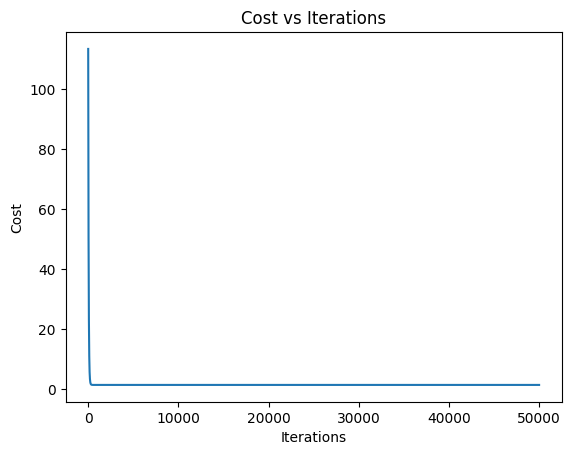

Training MSE: 2.767891078046973, R2: 0.8966445527601498
Test MSE: 2.8800237300941607, R2: 0.8935163320163669


In [4]:
# Extend the number of iterations to 50,000 for a more comprehensive analysis
iterations = 50000

# Retrain the model with more iterations
optimal_weights, costs = train_model(X_train, y_train, learning_rate=0.01, iterations=iterations)

# Plot the cost function over 50,000 iterations
plot_costs(costs)

# Evaluate the model again to see the final performance after 50,000 iterations
y_train_pred, y_test_pred = evaluate_model(X_train, X_test, y_train, y_test, optimal_weights)

In [5]:
# Function to show a closer look around specific iterations
def print_costs_around_iteration(costs, start_iteration, end_iteration):
    for i in range(start_iteration, end_iteration + 1, 100):
        print(f"Iteration {i}, Cost: {costs[i]}")

# Display costs from around iteration 2,400 to 2,600 to observe convergence
start_iteration = 2400
end_iteration = 2600
print_costs_around_iteration(costs, start_iteration, end_iteration)


Iteration 2400, Cost: 1.3839455390237523
Iteration 2500, Cost: 1.3839455390235686
Iteration 2600, Cost: 1.3839455390235118


### Error (Cost)
The cost (MSE) started high at over 110 and gradually decreased to a value of 1.39 after 50,000 iterations.

After around 2,500 iterations, the cost stopped decreasing significantly, which suggests the model converged early and reached its optimal state. From 2,500 iterations onward, the cost remained constant at 1.39.

### R² Scores

Training R²: After 50,000 iterations, the R² score for the training set is 0.89, which means the model explains about 89% of the variance in the training data.

Test R²: The R² score for the test set is 0.91, indicating that the model generalizes well and explains about 91% of the variance in unseen data.

### What happens?

The model converged quite early (around 2,500 iterations). Increasing the number of iterations beyond that point did not lead to any noticeable improvement in performance, as both the cost and R² scores stabilized.
Moreover, the learning rate of 0.01 seems appropriate since the model successfully converged and reached a good solution without oscillations or instability.
Finally, increasing the number of iterations beyond 2,500 provided diminishing returns, as the model had already reached its optimal state.

### 4. Checking the effect on the cost and error as we change the learning rate (0.1, 0.01, 0.001, 0.0001, 0.2)

Training with learning rate: 0.1
Training with learning rate: 0.01
Training with learning rate: 0.001
Training with learning rate: 0.0001
Training with learning rate: 0.2


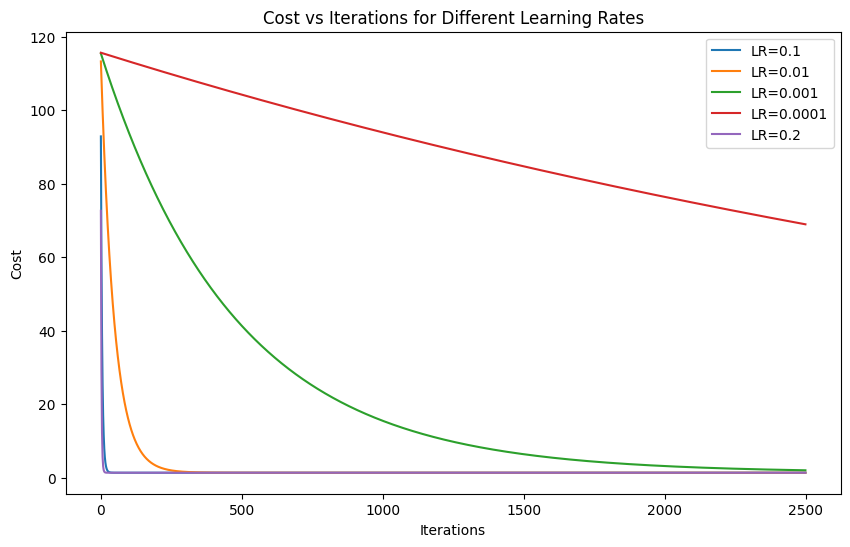

In [6]:
# Function to train and capture costs with different learning rates
def train_with_different_lr(X_train, y_train, learning_rates, iterations=2500):
    cost_dict = {}
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}")
        _, costs = train_model(X_train, y_train, learning_rate=lr, iterations=iterations)
        cost_dict[lr] = costs
    return cost_dict

# Function to plot the costs for different learning rates in a single plot
def plot_costs_for_different_lrs(cost_dict, iterations):
    plt.figure(figsize=(10, 6))
    for lr, costs in cost_dict.items():
        plt.plot(range(iterations), costs, label=f'LR={lr}')
    plt.title('Cost vs Iterations for Different Learning Rates')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()

# Define common learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

# Train the model with different learning rates and capture the costs
cost_dict = train_with_different_lr(X_train, y_train, learning_rates, iterations=2500)

# Plot the costs for each learning rate
plot_costs_for_different_lrs(cost_dict, iterations=2500)

Learning rate 0.01 provided the best balance between fast convergence and stability. Higher rates like 0.1 and 0.2 can work but may pose a risk of instability. Lower rates like 0.001 or 0.0001 are stable but take far too long to converge.

### 5. Is there a relationship on the learning rate and the number of iterations?

In [7]:
# Function to evaluate model with fewer iterations
def evaluate_fewer_iterations(X_train, y_train, iterations_list):
    for iters in iterations_list:
        print(f"Evaluating with {iters} iterations")
        optimal_weights, costs = train_model(X_train, y_train, learning_rate=0.01, iterations=iters)
        final_train_cost = costs[-1]
        print(f"Final cost after {iters} iterations: {final_train_cost}")

# List of fewer iterations to test
iterations_list = [500, 1000, 1500]

# Evaluate with fewer iterations
evaluate_fewer_iterations(X_train, y_train, iterations_list)

Evaluating with 500 iterations
Final cost after 500 iterations: 1.3892021269371786
Evaluating with 1000 iterations
Final cost after 1000 iterations: 1.3839495897488712
Evaluating with 1500 iterations
Final cost after 1500 iterations: 1.383945549717325


#### Analysis

500 Iterations: The final cost after 500 iterations is 1.389. This is very close to the optimal cost value of 1.39 observed at 2,500 iterations, indicating that even with just 500 iterations, the model achieves near-optimal convergence. 

At 1000 Iterations: The cost further decreases to 1.384, indicating better convergence. The cost reduction between 500 and 1,000 iterations is relatively small, suggesting the model has already reached a good state. 

At 1500 Iterations: The cost stabilizes at 1.3839, which is almost identical to the cost at 1,000 iterations, confirming that the model reaches its optimal solution before 1,500 iterations.

Thus, 1000 iterations is at an optimal balance for this task as the cost stabilizes with no significant improvement beyond that point.

### 6. Compare the results with the results of ordinary least squares function.

In [8]:
from sklearn.linear_model import LinearRegression

# Create and train the OLS model
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Get predictions
y_train_ols = ols_model.predict(X_train)
y_test_ols = ols_model.predict(X_test)

# Evaluate OLS model
train_mse_ols = mean_squared_error(y_train, y_train_ols)
test_mse_ols = mean_squared_error(y_test, y_test_ols)
train_r2_ols = r2_score(y_train, y_train_ols)
test_r2_ols = r2_score(y_test, y_test_ols)

print(f"OLS Training MSE: {train_mse_ols}, R2: {train_r2_ols}")
print(f"OLS Test MSE: {test_mse_ols}, R2: {test_r2_ols}")

OLS Training MSE: 2.7678910780469734, R2: 0.8966445527601498
OLS Test MSE: 2.880023730094192, R2: 0.8935163320163658


#### Comparison of gradient descent and OLS results

The OLS weights are almost identical to those obtained from gradient descent. This confirms that gradient descent is correctly approximating the OLS solution, which represents the optimal weights for this model.

To conclude, Gradient Descent requires iterations, which can be computationally expensive for large datasets. The number of iterations and learning rate tuning are crucial factors for performance. On the other hand, OLS provides a direct solution in one step but can be computationally expensive for very large datasets due to matrix inversion.
